# Background information
*   This notebooks contains the data analytic pipeline for the manuscript titled "Understanding Policing: A Quantitative Analysis" and submitted to *Perspectives on Behavior Science*.
*   Data for this notebook can be obtained from the Stanford Police Project: https://openpolicing.stanford.edu/data/. 

In [1]:
# Packages!!
import os
import sys
import pandas as pd
import numpy as np
import scipy
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv('/Users/davidjcox/Downloads/nc_statewide_2020_04_01.csv')
data = raw_data.copy()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,4,15,16,17,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
# Upload data 
from google.colab import drive
drive.mount('/content/gdrive')
%cd './gdrive/MyDrive/Policing Data/Statewide North Carolina/Data'
raw_data = pd.read_csv("nc_statewide_2020_04_01.csv")
data = raw_data.copy()

In [3]:
# Sample of what the data looks like and the data types
data.head()

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,...,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,raw_Ethnicity,raw_Race,raw_action_description
0,1,2000-05-22,21:10:00,Unknown,NaN,45.0,white,male,22e35044ed,"NC Division of Motor Vehicles, License and The...",...,False,False,False,NaN,NaN,NaN,Speed Limit Violation,N,W,Citation Issued
1,2,2000-01-03,07:52:00,Unknown,NaN,20.0,white,male,22e35044ed,"NC Division of Motor Vehicles, License and The...",...,False,False,False,NaN,NaN,NaN,Other Motor Vehicle Violation,N,W,Citation Issued
2,3,2000-01-06,10:30:00,Unknown,NaN,23.0,hispanic,male,22e35044ed,"NC Division of Motor Vehicles, License and The...",...,False,False,False,NaN,NaN,NaN,Speed Limit Violation,H,U,Written Warning
3,4,2000-01-06,14:50:00,Unknown,NaN,60.0,white,male,22e35044ed,"NC Division of Motor Vehicles, License and The...",...,False,False,False,NaN,NaN,NaN,Vehicle Regulatory Violation,N,W,Citation Issued
4,5,2000-01-06,14:50:00,Unknown,NaN,27.0,white,male,22e35044ed,"NC Division of Motor Vehicles, License and The...",...,False,False,False,NaN,NaN,NaN,Vehicle Regulatory Violation,N,W,Citation Issued


In [4]:
# Create year and month cols for grouping
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

# Distributions of stops and putative reinforcers per month for all officers

In [5]:
# Create individual data frames for the different independent and dependent variables
offcr_stops = data.groupby(['year', 'month', 'officer_id_hash']).size()
offcr_cites = data.groupby(['year', 'month', 'officer_id_hash', 'citation_issued']).size()
offcr_search = data.groupby(['year', 'month', 'officer_id_hash', 'search_conducted']).size()
offcr_frisk = data.groupby(['year', 'month', 'officer_id_hash', 'frisk_performed']).size()
offcr_contra = data.groupby(['year', 'month', 'officer_id_hash', 'contraband_found']).size()
offcr_arrest = data.groupby(['year', 'month', 'officer_id_hash', 'arrest_made']).size()

In [6]:
# Print descriptions of each subset dataframe 
from scipy.stats import skew
grouped_data = [offcr_stops, offcr_cites, offcr_search, offcr_frisk, offcr_contra, offcr_arrest]
data_type = ['Stops', 'Citations', 'Searches', 'Frisks', 'Contraband Found', 'Arrests']

for i in range(len(grouped_data)):
  print(data_type[i], "| Skew =", round(skew(grouped_data[i]), 4), "\n", grouped_data[i].describe(), "\n")

Stops | Skew = 393.6477 
 count    1.174607e+06
mean     1.727101e+01
std      1.333849e+02
min      1.000000e+00
25%      2.000000e+00
50%      7.000000e+00
75%      2.000000e+01
max      6.268900e+04
dtype: float64 

Citations | Skew = 424.2105 
 count    1.894062e+06
mean     1.071066e+01
std      8.181870e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.100000e+01
max      4.483200e+04
dtype: float64 

Searches | Skew = 435.0749 
 count    1.444708e+06
mean     1.404204e+01
std      1.192878e+02
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.500000e+01
max      6.202400e+04
dtype: float64 

Frisks | Skew = 395.993 
 count    1.189656e+06
mean     1.705253e+01
std      1.323066e+02
min      1.000000e+00
25%      2.000000e+00
50%      7.000000e+00
75%      2.000000e+01
max      6.256400e+04
dtype: float64 

Contraband Found | Skew = 127.5348 
 count    352299.000000
mean          1.774101
std           2.646274
min        

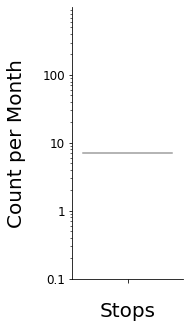

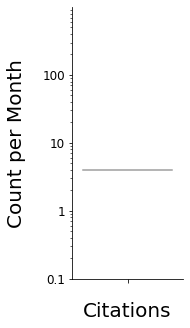

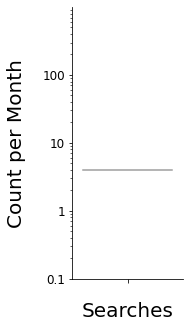

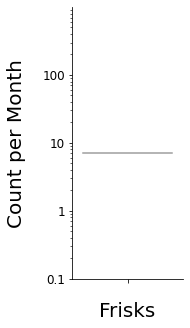

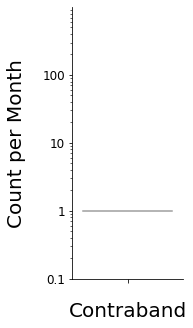

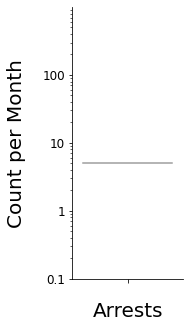

In [7]:
# Plot letter-value plots / boxen plots of the different distributions. 
# NB: These are Figure 1 in the manuscript
def boxen(df, x_label):
  f, ax = plt.subplots(figsize=(2, 5))
  sns.boxenplot(y=df, color='white')
  plt.xlabel(x_label, fontsize=20, labelpad=(16))
  plt.ylabel('Count per Month', fontsize=20, labelpad=(16))
  plt.ylim(.1, 1000)
  plt.yscale("log")
  plt.yticks(ticks=[.1, 1, 10, 100], labels=['0.1', '1', '10', '100'], fontsize=12)
  # plt.yticks(fontsize=12)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()

boxen(offcr_stops, 'Stops')
boxen(offcr_cites, 'Citations')
boxen(offcr_search, 'Searches')
boxen(offcr_frisk, 'Frisks')
boxen(offcr_contra, 'Contraband')
boxen(offcr_arrest, 'Arrests')

# Define single-alternative matching equation

In [8]:
# Define single alternative matching equation and import packages we'll need to
# play with it.  
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def single_match(x, k, re):
  return (k*x)/(x+re)

# Fit single-alternative matching to each officer's data

In [13]:
# Function for fitting single-alternative equation
def single_matching(df, unique_identifier, df_reinforcer, reinforcer_label, 
                    fit_df_name, subset_cat=None, month=False):
  """
    Function Inputs:
    ----------
    df: Dataframe from which to subset the individual officer data. 
    unique_identifier: Dataframe column containing the individual person id. 
    df_reinforcer: The column that contains the reinforcer being tested. 
    reinforcer_label: The label to assign to the reinforcer being tested. 
    fit_df_name: Name of the fit dataframe that is saved by running this function. 
    subset_cat: Column to subsetting df for fitting across different categories.
    month: True if binning by month and year. False if binning only by year. 

    DESCRIPTION: This function fits the single-altenative matching equation 
        (Herrnstein, 1970) to behavior data binned per month for every 
        officer in this dataframe. It is designed so you can run through a loop 
        and test a variety of potential reinforcers in your data set, determine 
        which one best describes each officer's data, and save the results. 

    Returns:
    -------
    None. Pandas dataframe automatically saved after every officer. The 
    auto-saved dataframe contains:
      (1) Unique officer id number
      (2) Reinforcer label
      (3) The subset category of the data for each fit (if specified)
      (4) The estimated k parameter for the single-alternative matching equation. 
      (5) The estimated Re parameter for the single-alternative matching equation. 
      (6) The variance accounted for by the single-alternative matching equation. 
  """
  import warnings
  warnings.filterwarnings('ignore')

  # Create list of all the unique officers in the dataset
  uniq_persons = df[unique_identifier].unique()
  
  # Lists for storing data
  person_num = []
  fit_type = []
  reinforcer_type = []
  k_val = []
  re_val = []
  r2_val = []
  error_list = []
  count = 1

  for i in uniq_persons:
    # Subset single officer data
    person_hash = i
    person_A = df[df[unique_identifier]==i]
    person_A = person_A[person_A['time'].notna()]
    person_A = person_A.reset_index()

    # Obtain rate of behavior per month and rate of citations per month
    person_reinforcer = person_A.groupby(['year', 'month'])[df_reinforcer].sum()
    person_behavior = person_A.groupby(['year', 'month']).size()

    if len(person_behavior) > 5:
      try:
        reinforcer_per_day = person_reinforcer / 30.42  # Convert to rate per day
        behavior_per_day = person_behavior / 30.42  # Convert to rate per day

        # Fit the single-alt matching equation to the officer data
        behavior = behavior_per_day.values
        reinforcer = reinforcer_per_day.values
        c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
        preds_from_obs = single_match(reinforcer, *c)  # Make predictions based on model params
        r_2 = r2_score(behavior, preds_from_obs) # Calculate vac to see how well the model fits

        # Append data to cols
        person_num.append(person_hash)
        reinforcer_type.append(reinforcer_label)
        fit_type.append('overall')
        k_val.append(c[0])
        re_val.append(c[1])
        r2_val.append(round(r_2, 4))

        # Save data
        All_Fits = pd.DataFrame({"person_num":person_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "vac":r2_val})
        All_Fits.to_csv('%s.csv' %fit_df_name)

        # Run the same analysis, but grouped by race
        # Calculate rate of behavior per day and rate of citations per day
        if month==True:
          person_reinforcer = person_A.groupby(['year', 'month', subset_cat])[df_reinforcer].sum().unstack()
          person_behavior = person_A.groupby(['year', 'month', subset_cat]).size().unstack()
          reinforcer_per_day = person_reinforcer / 30.42
          behavior_per_day = person_behavior / 30.42
        else:
          person_reinforcer = person_A.groupby(['year', subset_cat])[df_reinforcer].sum().unstack()
          person_behavior = person_A.groupby(['year', subset_cat]).size().unstack()
          reinforcer_per_day = person_reinforcer / 12
          behavior_per_day = person_behavior / 12
        reinforcer_per_day = reinforcer_per_day.fillna(0)
        behavior_per_day = behavior_per_day.fillna(0)

        # Loop through each race and fit the model
        cols = list(reinforcer_per_day)
        race_plot = []
        k_plot = []
        re_plot = []
        r2_plot = []

        for k in cols:
          behavior = behavior_per_day[k].values
          reinforcer = reinforcer_per_day[k].values
          param_seeds = [16, 5]
          c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
          preds_from_obs = single_match(reinforcer, *c) # Make predictions based on model params
          r_2 = r2_score(behavior, preds_from_obs) # Calculate vac to see how well the model fits

          # Append data to cols
          person_num.append(person_hash)
          reinforcer_type.append(reinforcer_label)
          fit_type.append(k)
          race_plot.append(k)
          k_val.append(c[0])
          k_plot.append(c[0])
          re_val.append(c[1])
          re_plot.append(c[1])
          r2_val.append(round(r_2, 4))
          r2_plot.append(round(r_2, 4))

        # Save data
        All_Fits = pd.DataFrame({"person_num":person_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "vac":r2_val})
        All_Fits.to_csv('All_Fits_Citations.csv')
        
        count+=1
        
        if count%100==0:
            print("%s fits completed" %count)
    
      except:
        error_list.append(i)
        err_officers = pd.DataFrame(error_list)
        err_officers.to_csv('Error_List_%s.csv' %reinforcer_label)
        All_Fits = pd.DataFrame({"person_num":person_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "vac":r2_val})
        All_Fits.to_csv('%s.csv' %fit_df_name)
        count+=1

In [14]:
# Citations as putative reinforcer binned by month
single_matching(df=data, unique_identifier='officer_id_hash', 
                df_reinforcer='citation_issued', reinforcer_label='citations', 
                fit_df_name='All_Fits_Citations', subset_cat='subject_race', 
                month=True)

100 fits completed
200 fits completed
300 fits completed
400 fits completed
500 fits completed
600 fits completed
700 fits completed
800 fits completed
900 fits completed
1000 fits completed
1100 fits completed
1200 fits completed
1300 fits completed
1400 fits completed
1500 fits completed
1600 fits completed
1700 fits completed
1800 fits completed
1900 fits completed
2000 fits completed
2100 fits completed
2200 fits completed
2300 fits completed
2400 fits completed
2500 fits completed
2600 fits completed
2700 fits completed
2800 fits completed
2900 fits completed
3000 fits completed
3100 fits completed
3200 fits completed
3300 fits completed
3400 fits completed
3500 fits completed
3600 fits completed
3700 fits completed
3800 fits completed
3900 fits completed
4000 fits completed
4100 fits completed
4200 fits completed
4300 fits completed
4400 fits completed
4500 fits completed
4600 fits completed
4700 fits completed
4800 fits completed
4900 fits completed
5000 fits completed
5100 fits

In [ ]:
# Searches as putative reinforcers binned by year
single_matching(df=data, unique_identifier='officer_id_hash', 
                df_reinforcer='search_conducted', reinforcer_label='searches', 
                fit_df_name='All_Fits_Searches', subset_cat='subject_race')

100 fits completed
200 fits completed
300 fits completed
400 fits completed
500 fits completed
600 fits completed
700 fits completed
800 fits completed
900 fits completed
1000 fits completed
1100 fits completed
1200 fits completed
1300 fits completed
1400 fits completed
1500 fits completed
1600 fits completed
1700 fits completed
1800 fits completed
1900 fits completed
2000 fits completed
2100 fits completed
2200 fits completed
2300 fits completed
2400 fits completed
2500 fits completed
2600 fits completed
2700 fits completed
2800 fits completed
2900 fits completed
3000 fits completed
3100 fits completed
3200 fits completed
3400 fits completed
3500 fits completed
3600 fits completed
3700 fits completed
3800 fits completed
3900 fits completed
4000 fits completed
4100 fits completed
4200 fits completed
4300 fits completed
4400 fits completed
4500 fits completed
4600 fits completed
4700 fits completed
4800 fits completed
4900 fits completed
5000 fits completed
5100 fits completed
5200 fits

In [ ]:
# Frisk as putative reinforcers binned by year
single_matching(df=data, unique_identifier='officer_id_hash', 
                df_reinforcer='frisk_performed', reinforcer_label='frisks', 
                fit_df_name='All_Fits_Frisks', subset_cat='subject_race')

In [ ]:
# Contraband as putative reinforcers binned by year
single_matching(df=data, unique_identifier='officer_id_hash', 
                df_reinforcer='contraband_found', reinforcer_label='contraband', 
                fit_df_name='All_Fits_Contraband', subset_cat='subject_race')

In [ ]:
# Arrests as putative reinforcers binned by year
single_matching(df=data, unique_identifier='officer_id_hash', 
                df_reinforcer='arrest_made', reinforcer_label='arrests', 
                fit_df_name='All_Fits_Arrests', subset_cat='subject_race')

# Combine all fit dataframes into single dataframe

In [ ]:
# Combine all fit dataframes into single dataframe
cite_fits = pd.read_csv('All_Fits_Citations.csv')
cite_fits = cite_fits.drop(['Unnamed: 0'], axis=1)
search_fits = pd.read_csv('All_Fits_Searches.csv')
search_fits = search_fits.drop(['Unnamed: 0'], axis=1)
frisk_fits = pd.read_csv('All_Fits_Frisks.csv')
frisk_fits = frisk_fits.drop(['Unnamed: 0'], axis=1)
contra_fits = pd.read_csv('All_Fits_Contraband.csv')
contra_fits = contra_fits.drop(['Unnamed: 0'], axis=1)
arrest_fits = pd.read_csv('All_Fits_Arrests.csv')
arrest_fits = arrest_fits.drop(['Unnamed: 0'], axis=1)

all_fits = cite_fits.append([search_fits, frisk_fits, contra_fits, arrest_fits])
all_fits.to_csv('All_Single_Alt_Matching_Fits.csv')

In [ ]:
all_fits.columns = ['person_num', 'reinforcer', 'fit_type', 'est_k', 'est_re', 'vac']

# Proportion descriptions for ms

In [ ]:
# Distribution vals for everything
pd.set_option('max_colwidth', 30) 
pd.set_option('max_rows', len(all_fits))
all_fits.groupby(['fit_type', 'reinforcer']).describe()

In [ ]:
# Print the proportion of officers whose databehavior was described by the 
# single-alternative matching equation with vac greater than 90%
print((round((cite_fits['vac'].ge(0.9).sum())/len(cite_fits), 5)), "= Citation Proportion >90%")
print((round((search_fits['vac'].ge(0.9).sum())/len(search_fits), 5)), "= Search Proportion >90%")
print((round((frisk_fits['vac'].ge(0.9).sum())/len(frisk_fits), 5)), "= Frisk Proportion >90%")
print((round((contra_fits['vac'].ge(0.9).sum())/len(contra_fits), 5)), "= Contraband Found Proportion >90%")
print((round((arrest_fits['vac'].ge(0.9).sum())/len(arrest_fits), 5)), "= Arrest Proportion >90%")

In [ ]:
# Print the proportion of officers whose databehavior was described by the 
# single-alternative matching equation with vac greater than 80%
print((round((cite_fits['vac'].ge(0.8).sum())/len(cite_fits), 5)), "= Citation Proportion >80%")
print((round((search_fits['vac'].ge(0.8).sum())/len(search_fits), 5)), "= Search Proportion >80%")
print((round((frisk_fits['vac'].ge(0.8).sum())/len(frisk_fits), 5)), "= Frisk Proportion >80%")
print((round((contra_fits['vac'].ge(0.8).sum())/len(contra_fits), 5)), "= Contraband Found Proportion >80%")
print((round((arrest_fits['vac'].ge(0.8).sum())/len(arrest_fits), 5)), "= Arrest Proportion >80%")

In [ ]:
# Print the number of officers for whom:
# VAC > 90%
print('VAC > 90%')
print(cite_fits['vac'].ge(0.9).sum(), "= Citation Count")
print(search_fits['vac'].ge(0.9).sum(), "= Search Count")
print(frisk_fits['vac'].ge(0.9).sum(), "= Frisk Count")
print(contra_fits['vac'].ge(0.9).sum(), "= Contraband Count")
print(arrest_fits['vac'].ge(0.9).sum(), "= Arrest Count")

# VAC > 80%
print('\nVAC > 80%')
print(cite_fits['vac'].ge(0.8).sum(), "= Citation Count")
print(search_fits['vac'].ge(0.8).sum(), "= Search Count")
print(frisk_fits['vac'].ge(0.8).sum(), "= Frisk Count")
print(contra_fits['vac'].ge(0.8).sum(), "= Contraband Count")
print(arrest_fits['vac'].ge(0.8).sum(), "= Arrest Count")

In [ ]:
# Create list of officers for whom vac was > 90% using Eq. 1
def offcrs_90(df):
  temp_list = []
  reinf = []
  for i in range(len(df)):
    if df['vac'][i]>=0.90:
      if df['person_num'][i] in temp_list:
        continue
      else:
        temp_list.append(df['person_num'][i])
        reinf.append(df['reinforcer'][i])
  return pd.DataFrame(list(zip(temp_list, reinf)), columns=['person_num', 'reinforcer'])

cites_offcr = offcrs_90(cite_fits)
search_offcr = offcrs_90(search_fits)
frisk_offcr = offcrs_90(frisk_fits)
contra_offcr = offcrs_90(contra_fits)
arrest_offcr = offcrs_90(arrest_fits)

# Combine all officer dfs where VAC was .90 or greater
all_offcr90s = cites_offcr.append(search_offcr)
all_offcr90s = all_offcr90s.append(frisk_offcr)
all_offcr90s = all_offcr90s.append(contra_offcr)
all_offcr90s = all_offcr90s.append(arrest_offcr)

# Show value counts for all_offcr90s df
print("Unique Officers with VAC > 0.90 = %s" %len(all_offcr90s['person_num'].unique()))
offcr90_val_counts = pd.DataFrame(all_offcr90s.value_counts(), columns=['count'])
offcr90_val_counts['count'].value_counts()

In [ ]:
# Combine all officer dfs where VAC was .90 or greater
all_offcr90s = cites_offcr.append(search_offcr)
all_offcr90s = all_offcr90s.append(frisk_offcr)
all_offcr90s = all_offcr90s.append(contra_offcr)
all_offcr90s = all_offcr90s.append(arrest_offcr)

In [ ]:
print("Unique Officers with VAC > 90 = %s" %len(all_offcr90s['person_num'].unique()))
offcr90_val_counts = pd.DataFrame(all_offcr90s.value_counts(), columns=['count'])
offcr90_val_counts['count'].unique()